In [1]:
import torch
# Set default tensor type to float64
torch.set_default_dtype(torch.float64)

from botorch.test_functions.synthetic import Levy

# Test the 5D Levy function
dim = 5
levy_function = Levy(dim=5)

# Define the objective function
def objective_function(X):
    return levy_function(20*X-10)

In [2]:
bounds = torch.stack([torch.zeros(dim), torch.ones(dim)])
seed = 42
maximize = False
num_iterations = 50

In [3]:
from pandora_bayesopt.bayesianoptimizer import BayesianOptimizer
from botorch.utils.sampling import draw_sobol_samples
from botorch.acquisition import ExpectedImprovement
from pandora_bayesopt.acquisition import GittinsIndex

In [4]:
torch.manual_seed(seed)

init_x = draw_sobol_samples(bounds=bounds, n=1, q=2*dim+1, seed=seed).squeeze(0)

# Create an instance of BayesianOptimizer
EI_optimizer = BayesianOptimizer(objective=objective_function, dim=dim, maximize=maximize, initial_points=init_x, input_standardize=True)
# Run the optimization
EI_optimizer.run(num_iterations=num_iterations, acquisition_function_class=ExpectedImprovement)
EI_best_history = EI_optimizer.get_best_history()

Acq value: tensor(7.6895)
Iteration 0, New point: [0.59712749 0.27018275 0.45361678 0.41095431 0.49688655], New value: 9.804481756002575
Best observed value: 9.804481756002575
Cumulative cost: 1.0

Acq value: tensor(3.5379)
Iteration 1, New point: [0.57120118 0.22750651 0.40998454 0.54276974 0.35073547], New value: 25.133254981023487
Best observed value: 9.804481756002575
Cumulative cost: 2.0

Acq value: tensor(4.7235)
Iteration 2, New point: [0.59227329 0.32473528 0.49081819 0.31227113 0.62782167], New value: 10.153958695907976
Best observed value: 9.804481756002575
Cumulative cost: 3.0

Acq value: tensor(3.2304)
Iteration 3, New point: [0.48807862 0.49691715 0.44860813 0.43897621 0.50491058], New value: 3.749915277058188
Best observed value: 3.749915277058188
Cumulative cost: 4.0

Acq value: tensor(1.9525)
Iteration 4, New point: [0.33235537 0.45364167 0.38884707 0.46432931 0.52585956], New value: 14.781158406670368
Best observed value: 3.749915277058188
Cumulative cost: 5.0

Acq val

In [5]:
torch.manual_seed(seed)

init_x = draw_sobol_samples(bounds=bounds, n=1, q=2*dim+1, seed=seed).squeeze(0)

# Example usage with GittinsIndex
GIfree_optimizer = BayesianOptimizer(objective=objective_function, dim=dim, maximize=maximize, initial_points=init_x, input_standardize=True)
GIfree_optimizer.run(num_iterations=num_iterations, acquisition_function_class=GittinsIndex)
GIfree_best_history = GIfree_optimizer.get_best_history()

current lambda: 3.8447608368933017
Acq value: tensor(-7.0771)
Iteration 0, New point: [0.59626    0.27323531 0.44335477 0.41563098 0.512827  ], New value: 9.265709838179419
Best observed value: 9.265709838179419
Cumulative cost: 1.0

current lambda: 3.8447608368933017
Acq value: tensor(-10.1163)
Iteration 1, New point: [0.57529862 0.22705675 0.41311625 0.53350162 0.35406586], New value: 25.097225599441135
Best observed value: 9.265709838179419
Cumulative cost: 2.0

current lambda: 2.5276011861539205
Acq value: tensor(-3.1057)
Iteration 2, New point: [0.56736975 0.32909699 0.47844264 0.29662278 0.67786463], New value: 8.910692284505851
Best observed value: 8.910692284505851
Cumulative cost: 3.0

current lambda: 2.5276011861539205
Acq value: tensor(-5.7386)
Iteration 3, New point: [0.47856098 0.51554766 0.44376288 0.43674618 0.53498713], New value: 4.323338811828662
Best observed value: 4.323338811828662
Cumulative cost: 4.0

current lambda: 1.1636575222018073
Acq value: tensor(-0.3314)


In [6]:
torch.manual_seed(seed)

init_x = draw_sobol_samples(bounds=bounds, n=1, q=2*dim+1, seed=seed).squeeze(0)

# Example usage with GittinsIndex
GIlmbda_optimizer = BayesianOptimizer(objective=objective_function, dim=dim, maximize=maximize, initial_points=init_x, input_standardize=True)
GIlmbda_optimizer.run(num_iterations=num_iterations, acquisition_function_class=GittinsIndex, lmbda=0.0001)
GIlmbda_best_history = GIlmbda_optimizer.get_best_history()

Acq value: tensor(71.8751)
Iteration 0, New point: [0.47455421 0.30760629 0.36264767 0.41113407 0.70205475], New value: 18.35132083642119
Best observed value: 16.585019836139274
Cumulative cost: 1.0

Acq value: tensor(64.3467)
Iteration 1, New point: [0.74346756 0.         0.35173182 0.45370842 0.32604793], New value: 97.23210645866712
Best observed value: 16.585019836139274
Cumulative cost: 2.0

Acq value: tensor(91.1353)
Iteration 2, New point: [0.639163   0.29814934 0.48972846 0.00776627 0.7936832 ], New value: 80.0426710778328
Best observed value: 16.585019836139274
Cumulative cost: 3.0

Acq value: tensor(88.5799)
Iteration 3, New point: [0.37653135 0.61787512 0.3059924  0.4875368  0.48293193], New value: 12.424723114421573
Best observed value: 12.424723114421573
Cumulative cost: 4.0

Acq value: tensor(83.8586)
Iteration 4, New point: [0.         0.34789146 0.32621669 0.53299413 0.49353866], New value: 93.94834470306085
Best observed value: 12.424723114421573
Cumulative cost: 5.0



Text(0.5, 1.0, 'Performance of EI vs Gittins on Levy')

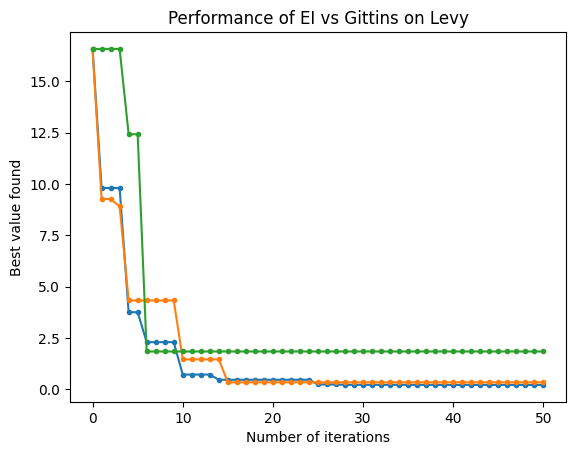

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(num_iterations+1), EI_best_history,'.-')
plt.plot(range(num_iterations+1), GIfree_best_history,'.-')
plt.plot(range(num_iterations+1), GIlmbda_best_history,'.-')
plt.xlabel('Number of iterations')
plt.ylabel('Best value found')
plt.title("Performance of EI vs Gittins on Levy")